# Features y predicción

**Realizar una exploración visual.** 
<br/>

* ¿Es relevante el género para el abandono? (es decir, ¿hay más
probabilidades de que abandone siendo de algún género en particular?). 
* ¿Si es un senior citizen? 
* ¿El método de pago?

<hr/>

In [37]:
# Libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.close("all")

import seaborn as sns

In [38]:
df_churn = pd.read_csv('../data/preprocessed/churn_preprocessed.csv')

In [39]:
df_churn.columns

Index(['Unnamed: 0', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'Churn'],
      dtype='object')

<hr/>

Segmentamos y agregamos la data para poder hacer análisis.

In [40]:
gender = pd.DataFrame(df_churn.groupby(['gender', 'Churn'])['Churn'].agg(['count'])).reset_index()
SeniorCitizen = pd.DataFrame(df_churn.groupby(['SeniorCitizen','Churn'])['Churn'].agg(['count'])).reset_index()
PaymentMethod = pd.DataFrame(df_churn.groupby(['PaymentMethod','Churn'])['Churn'].agg(['count'])).reset_index()

**¿Es relevante el género para el abandono?**
<br/>
No es relevante.


In [41]:
gender = gender.rename(columns={'Churn':'churn','count': 'amount'})
gender

gender churn  amount
0  Female    No    2200
1  Female   Yes     800
2    Male    No    2234
3    Male   Yes     798

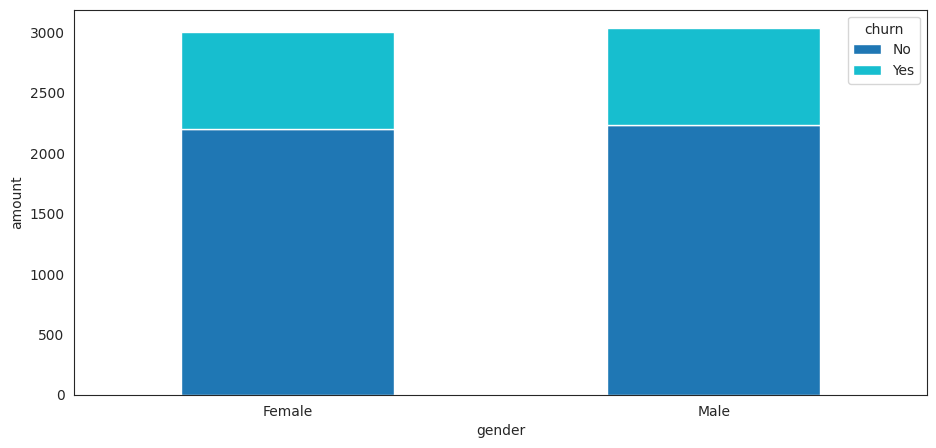

In [42]:
sns.set_style('white')
(gender
    .groupby(['gender', 'churn'])
    .amount
    .sum()
    .unstack()
).plot(kind='bar', stacked=True, color=['tab:blue', 'tab:cyan'], width=0.5, figsize=(11, 5))

plt.xticks(rotation=0)
plt.ylabel('amount');

**¿Si es un senior citizen?**

La visualización muestra que SeniorCitizen = Yes tienen similares proporciones para Churn = Yes/No. Esto significa que ser SeniorCitizen no se relaciona a una condición específica de Churn.
<br/>

**Del lado opuesto, no ser SeriorCitizen aumenta las probabilidades de Churn = No.**

In [43]:
SeniorCitizen = SeniorCitizen.rename(columns={'Churn':'churn','count': 'amount'})
SeniorCitizen

SeniorCitizen churn  amount
0            No    No    3861
1            No   Yes    1180
2           Yes    No     573
3           Yes   Yes     418

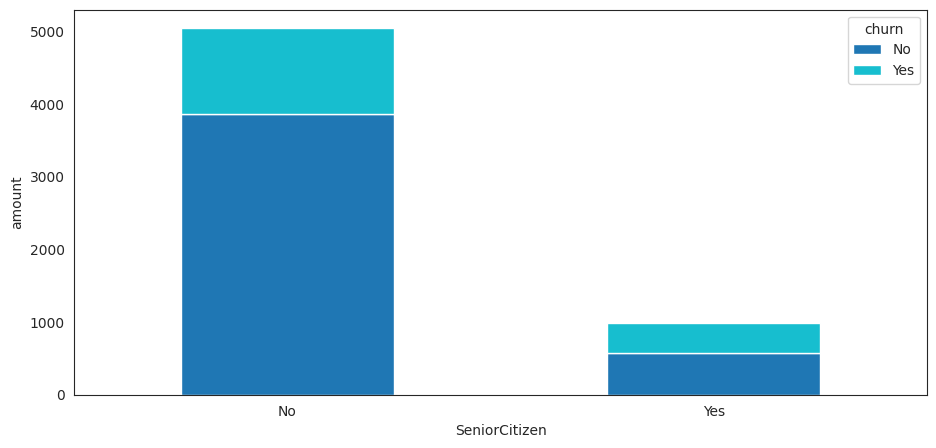

In [44]:
sns.set_style('white')
(SeniorCitizen
    .groupby(['SeniorCitizen', 'churn'])
    .amount
    .sum()
    .unstack()
).plot(kind='bar', stacked=True, color=['tab:blue', 'tab:cyan'], width=0.5, figsize=(11, 5))

plt.xticks(rotation=0)
plt.ylabel('amount');

**¿El método de pago?**

Hay mayor probabilidad de Churn = Yes si el cliente tiene como método de pago **Electronic check**.

In [45]:
PaymentMethod = PaymentMethod.rename(columns={'Churn':'churn','count': 'amount'})
PaymentMethod

PaymentMethod churn  amount
0  Bank transfer (automatic)    No    1092
1  Bank transfer (automatic)   Yes     212
2    Credit card (automatic)    No    1114
3    Credit card (automatic)   Yes     199
4           Electronic check    No    1103
5           Electronic check   Yes     913
6               Mailed check    No    1125
7               Mailed check   Yes     274

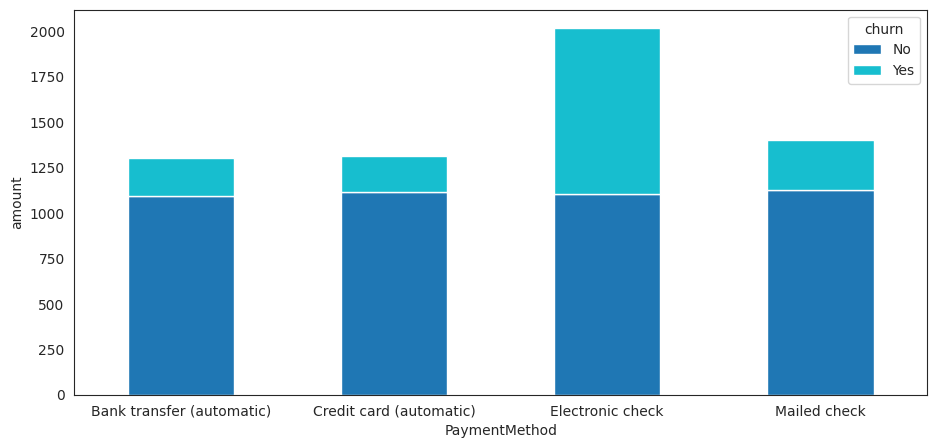

In [46]:
sns.set_style('white')
(PaymentMethod
    .groupby(['PaymentMethod', 'churn'])
    .amount
    .sum()
    .unstack()
).plot(kind='bar', stacked=True, color=['tab:blue', 'tab:cyan'], width=0.5, figsize=(11, 5))

plt.xticks(rotation=0)
plt.ylabel('amount');